### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# d stands for daily
d_activity = pd.read_csv('Fitbit Data/dailyActivity_merged.csv')
d_calories = pd.read_csv('Fitbit Data/dailyCalories_merged.csv')
d_steps = pd.read_csv('Fitbit Data/dailySteps_merged.csv')

# h stands for hourly 
h_calories = pd.read_csv('Fitbit Data/hourlyCalories_merged.csv')
h_steps = pd.read_csv('Fitbit Data/hourlySteps_merged.csv')

# m stands for Minutes
m_mets = pd.read_csv('Fitbit Data/minuteMETsNarrow_merged.csv')
m_steps = pd.read_csv('Fitbit Data/minuteStepsNarrow_merged.csv')
m_calories = pd.read_csv('Fitbit Data/minuteCaloriesNarrow_merged.csv')

In [3]:
d_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


2303.609574468085
2134.0


<function matplotlib.pyplot.show(close=None, block=None)>

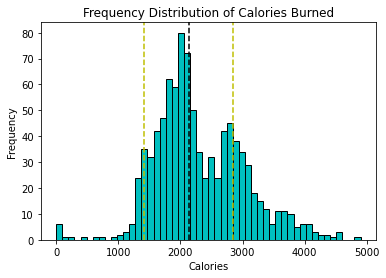

In [17]:
# Histogram of Calories
data = d_activity['Calories']

mean = np.mean(data)
print(mean)
median = np.median(data)
print(median)
std = np.std(data)

plt.axvline(median, color='k', linestyle='dashed')
plt.axvline(median + std, color='y', linestyle='dashed')
plt.axvline(median - std, color='y', linestyle='dashed')

plt.hist(data, bins=50, color='c', edgecolor='k')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Calories Burned')

plt.show

In [5]:
# the above graph shows the calorie distribution of all users who used the Fitbit app
# I used the median--2134.0 to get the center of the distribution because the graph is slightly skewed to the left

In [6]:
Id_list = d_activity['Id'].unique().tolist()

d_activity['Id'].value_counts().describe()

count    33.000000
mean     28.484848
std       5.657524
min       4.000000
25%      29.000000
50%      31.000000
75%      31.000000
max      31.000000
Name: Id, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

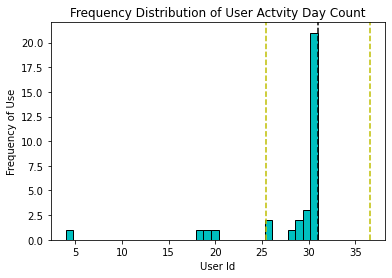

In [7]:
# Histogram of Active Users
data = d_activity['Id'].value_counts()

mean = np.mean(data)
median = np.median(data)
std = np.std(data)

plt.axvline(median, color='k', linestyle='dashed')
plt.axvline(median + std, color='y', linestyle='dashed')
plt.axvline(median - std, color='y', linestyle='dashed')

plt.hist(data, bins=33, color='c', edgecolor='k')
plt.xlabel('User Id')
plt.ylabel('Frequency of Use')
plt.title('Frequency Distribution of User Actvity Day Count')

plt.show

In [8]:
# the graph above shows that MOST users used the fitbit app for 31 days which is true based on the description of the dataset.

In [9]:
steps_distance_corr = np.corrcoef(d_activity['TotalSteps'], d_activity['TotalDistance'])
print(steps_distance_corr)
# steps_distance_corr = 0.98536884

[[1.         0.98536884]
 [0.98536884 1.        ]]


<function matplotlib.pyplot.show(close=None, block=None)>

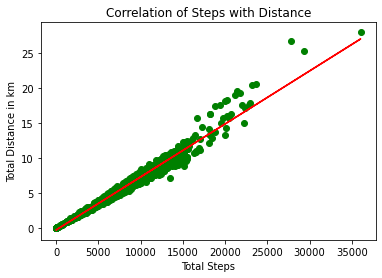

In [10]:
x = d_activity['TotalSteps']
y = d_activity['TotalDistance']
plt.plot(x, y, 'o', color='green')
plt.xlabel('Total Steps')
plt.ylabel('Total Distance in km')
plt.title('Correlation of Steps with Distance')

# obtain slope (m) and intercept (b) of linear regression line 
m, b = np.polyfit(x, y, 1)

# plot the linear regression line
plt.plot(x, m*x+b, color='red')
plt.show

In [11]:
x = d_activity['TotalSteps']
y = d_activity['TotalDistance']

x_mean = np.mean(x)
print(x_mean)
y_mean = np.mean(y)
print(y_mean)

# On an average, users spent 77,638 that covered the distance of 5 km  

7637.9106382978725
5.489702121915416


In [12]:
# The graph above shows that steps and distance are highly correlated which means that the accuracy of the fitbit app and the 
# device to record steps and distance is highly accurate. 

[[1.         0.59156809]
 [0.59156809 1.        ]]


<function matplotlib.pyplot.show(close=None, block=None)>

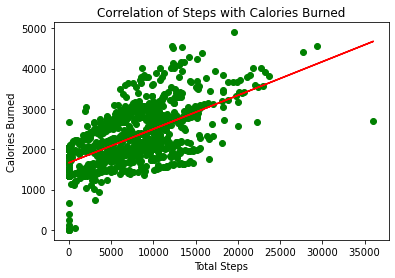

In [13]:
# correlation of daily steps and daily calories
steps_calories_corr = np.corrcoef(d_steps['StepTotal'], d_calories['Calories'])
print(steps_calories_corr)
# output 0.59156809

# plotting
x = d_steps['StepTotal']
y = d_calories['Calories']
plt.plot(x, y, 'o', color='green')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.title('Correlation of Steps with Calories Burned')

# obtain slope (m) and intercept (b) of linear regression line 
m, b = np.polyfit(x, y, 1)

# plot the linear regression line
plt.plot(x, m*x+b, color='red')
plt.show


[[1.         0.81496797]
 [0.81496797 1.        ]]


<function matplotlib.pyplot.show(close=None, block=None)>

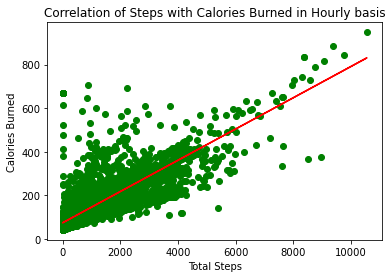

In [14]:
# correlation of hourly steps and calories
hourly_steps_calories_corr = np.corrcoef(h_steps['StepTotal'], h_calories['Calories'])
print(hourly_steps_calories_corr)

# plotting
x = h_steps['StepTotal']
y = h_calories['Calories']
plt.plot(x, y, 'o', color='green')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.title('Correlation of Steps with Calories Burned in Hourly basis')

# obtain slope (m) and intercept (b) of linear regression line 
m, b = np.polyfit(x, y, 1)

# plot the linear regression line
plt.plot(x, m*x+b, color='red')
plt.show

[[1.         0.95596063]
 [0.95596063 1.        ]]


<function matplotlib.pyplot.show(close=None, block=None)>

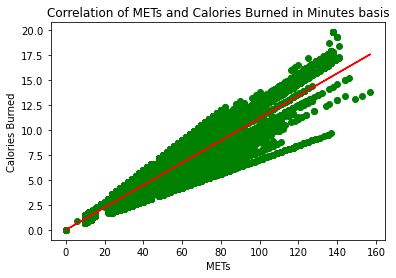

In [15]:
minute_mets_calories_corr = np.corrcoef(m_mets['METs'], m_calories['Calories'])
print(minute_mets_calories_corr)
# output 0.83106106

# plotting
x = m_mets['METs']
y = m_calories['Calories']
plt.plot(x, y, 'o', color='green')
plt.xlabel('METs')
plt.ylabel('Calories Burned')
plt.title('Correlation of METs and Calories Burned in Minutes basis')

# obtain slope (m) and intercept (b) of linear regression line 
m, b = np.polyfit(x, y, 1)

# plot the linear regression line
plt.plot(x, m*x+b, color='red')
plt.show

[[1.         0.83106106]
 [0.83106106 1.        ]]


<function matplotlib.pyplot.show(close=None, block=None)>

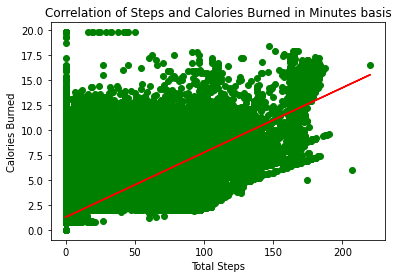

In [16]:
minute_steps_calorreis_corr = np.corrcoef(m_steps['Steps'], m_calories['Calories'])
print(minute_steps_calorreis_corr)
# output 0.95596063

# plotting
x = m_steps['Steps']
y = m_calories['Calories']
plt.plot(x, y, 'o', color='green')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.title('Correlation of Steps and Calories Burned in Minutes basis')

# obtain slope (m) and intercept (b) of linear regression line 
m, b = np.polyfit(x, y, 1)

# plot the linear regression line
plt.plot(x, m*x+b, color='red')
plt.show